# AR Model

All the libraries:

In [1]:
%matplotlib notebook
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from pandas import Series
from matplotlib import pyplot as plt
from matplotlib.pyplot import xticks

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from pathlib import Path

In [4]:
WDI_path = Path( "/home/hendra/Datasets/WDI_Indonesia/" )

In [ ]:
#WDI_path = "/home/hendra/Datasets/WDI_Indonesia/"

In [6]:
WDI_df = pd.read_csv( WDI_path / "completed_values_1962_2013_design_matrix_with_codes_by_year.csv" )
# WDI_df = pd.read_csv("completed_values_1962_2013_design_matrix_with_codes_by_year.csv")

The indicator name is displayed below:

In [7]:
WDI_df.columns[1]

'EN.ATM.CO2E.KD.GD'

We divide the dataset into 2 as follows: _train set_ and _test set_.         
The _train set_ and _test set_ comprise of 49 (from 1962 to 2010) and 3 (from 2011 to 2013) examples respectively.

In [9]:
WDI_df.shape

(52, 172)

In [10]:
train_set, test_set = WDI_df.iloc[:49, 1], WDI_df.iloc[49:,1]

In [11]:
len(train_set), len(test_set)

(49, 3)

We train the **AR** model.

In [13]:
ar_model = AR(train_set)
ar_model_fit = ar_model.fit(disp=False)

Next we make predictions. 

In [14]:
ar_predictions = ar_model_fit.predict(len(train_set), len(train_set)+2)
print(ar_predictions)

49    0.540190
50    0.541905
51    0.544837
dtype: float64


We create a list of years which we predict.

In [15]:
test_year = [2011, 2012, 2013]

#### Referensi untuk menghitung [_performance measure_](https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python).

In [16]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-ar_predictions.values[i] for i in range(len(test_set))]
ar_mfe = sum(forecast_errors) * 1.0/len(test_set)
print('MFE: %f' % ar_mfe)

# Mean Absolute Error
ar_mae = mean_absolute_error(test_set, ar_predictions)
print('MAE: %f' % ar_mae)

# Mean Squared Error
ar_mse = mean_squared_error(test_set, ar_predictions)
print('MSE: %f' % ar_mse)

# Root Mean Squared Error
ar_rmse = np.sqrt(ar_mse)
print('RMSE: %f' % ar_rmse)

MFE: 0.109288
MAE: 0.116344
MSE: 0.019151
RMSE: 0.138387


Let us plot our predictions dan true values.

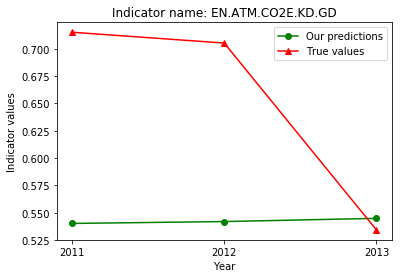

In [17]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, ar_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# MA Model

In [18]:
ma_model = ARMA(train_set, order=(0, 1))
ma_model_fit = ma_model.fit(disp=False)

In [19]:
ma_predictions = ma_model_fit.predict(len(train_set), len(train_set)+2)
print(ma_predictions)

49    0.530152
50    0.537200
51    0.537200
dtype: float64


In [20]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-ma_predictions.values[i] for i in range(len(test_set))]
ma_mfe = sum(forecast_errors) * 1.0/len(test_set)
print('MFE: %f' % ma_mfe)

# Mean Absolute Error
ma_mae = mean_absolute_error(test_set, ma_predictions)
print('MAE: %f' % ma_mae)

# Mean Squared Error
ma_mse = mean_squared_error(test_set, ma_predictions)
print('MSE: %f' % ma_mse)

# Root Mean Squared Error
ma_rmse = np.sqrt(ma_mse)
print('RMSE: %f' % ma_rmse)

MFE: 0.116748
MAE: 0.118712
MSE: 0.020841
RMSE: 0.144365


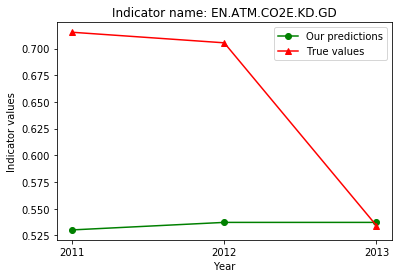

In [21]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, ma_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# ARMA Model

In [22]:
arma_model = ARMA(train_set, order=(2, 1))
arma_model_fit = arma_model.fit(disp=False)

In [23]:
arma_predictions = arma_model_fit.predict(len(train_set), len(train_set)+2)
print(arma_predictions)

49    0.558240
50    0.549595
51    0.541877
dtype: float64


In [24]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-arma_predictions.values[i] for i in range(len(test_set))]
arma_mfe = sum(forecast_errors) * 1.0/len(test_set)

print('MFE: %f' % arma_mfe)
# Mean Absolute Error
arma_mae = mean_absolute_error(test_set, arma_predictions)
print('MAE: %f' % arma_mae)

# Mean Squared Error
arma_mse = mean_squared_error(test_set, arma_predictions)
print('MSE: %f' % arma_mse)

# Root Mean Squared Error
arma_rmse = np.sqrt(arma_mse)
print('RMSE: %f' % arma_rmse)

MFE: 0.101695
MAE: 0.106777
MSE: 0.016317
RMSE: 0.127739


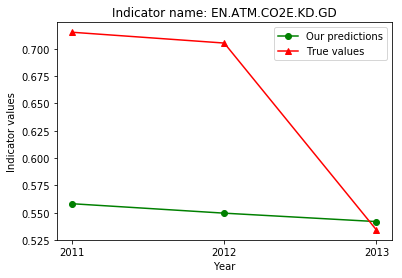

In [25]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, arma_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# ARIMA Model

In [26]:
arima_model = ARIMA(train_set, order=(0,0,0))
arima_model_fit = arima_model.fit(disp=False)

In [27]:
arima_predictions = arima_model_fit.predict(len(train_set), len(train_set)+2)
print(arima_predictions)

49    0.53874
50    0.53874
51    0.53874
dtype: float64


In [29]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-arima_predictions.values[i] for i in range(len(test_set))]
arima_mfe = sum(forecast_errors) * 1.0/len(test_set)
print('MFE: %f' % arima_mfe)

# Mean Absolute Error
arima_mae = mean_absolute_error(test_set, arima_predictions)
print('MAE: %f' % arima_mae)

# Mean Squared Error
arima_mse = mean_squared_error(test_set, arima_predictions)
print('MSE: %f' % arima_mse)

# Root Mean Squared Error
arima_rmse = np.sqrt(arima_mse)
print('RMSE: %f' % arima_rmse)

MFE: 0.112859
MAE: 0.115850
MSE: 0.019638
RMSE: 0.140137


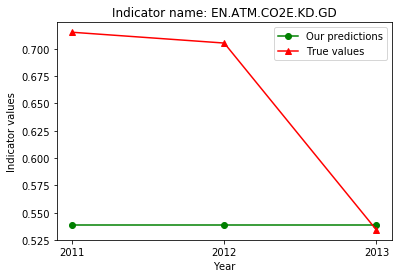

In [30]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, arima_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# SARIMA Model

In [31]:
sarima_model = SARIMAX(train_set, order=(1, 1, 1), seasonal_order=(0,0,0,0))
sarima_model_fit = sarima_model.fit(disp=False)

In [32]:
sarima_predictions = sarima_model_fit.predict(len(train_set), len(train_set)+2)
print(sarima_predictions)

49    0.569099
50    0.570131
51    0.570968
dtype: float64


In [33]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-sarima_predictions.values[i] for i in range(len(test_set))]
sarima_mfe = sum(forecast_errors) * 1.0/len(test_set)
print('MFE: %f' % sarima_mfe)

# Mean Absolute Error
sarima_mae = mean_absolute_error(test_set, sarima_predictions)
print('MAE: %f' % sarima_mae)

# Mean Squared Error
sarima_mse = mean_squared_error(test_set, sarima_predictions)
print('MSE: %f' % sarima_mse)

# Root Mean Squared Error
sarima_rmse = np.sqrt(sarima_mse)
print('RMSE: %f' % sarima_rmse)

MFE: 0.081532
MAE: 0.106009
MSE: 0.013659
RMSE: 0.116870


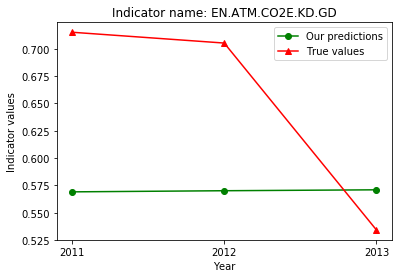

In [34]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, sarima_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# SARIMAX Model

We do not utilize the **SARIMAX** model as our time series has no trend and/or seasonal components and exogenous variables.

# SES Model

In [45]:
ses_model = SimpleExpSmoothing(train_set)
ses_model_fit = ses_model.fit()

In [48]:
ses_predictions = ses_model_fit.predict(start=len(train_set), end=len(train_set)+2)
print(ses_predictions)

49    0.567824
50    0.567824
51    0.567824
dtype: float64


In [49]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-ses_predictions[i] for i in range(len(test_set))]
ses_mfe = sum(forecast_errors) * 1.0/len(test_set)
print('MFE: %f' % ses_mfe)

# Mean Absolute Error
ses_mae = mean_absolute_error(test_set, ses_predictions)
print('MAE: %f' % ses_mae)

# Mean Squared Error
ses_mse = mean_squared_error(test_set, ses_predictions)
print('MSE: %f' % ses_mse)

# Root Mean Squared Error
ses_rmse = np.sqrt(ses_mse)
print('RMSE: %f' % ses_rmse)

KeyError: 0

In [ ]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, ses_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# HWES Model

In [ ]:
hwes_model = ExponentialSmoothing(train_set)
hwes_model_fit = hwes_model.fit()

In [ ]:
hwes_predictions = model_fit.predict(start=len(train_set), end=len(train_set)+2)
print(hwes_predictions)

In [ ]:
# Mean Forecast Error
forecast_errors = [test_set.values[i]-hwes_predictions[i] for i in range(len(test_set))]
hwes_mfe = sum(forecast_errors) * 1.0/len(test_set)
print('MFE: %f' % hwes_mfe)

# Mean Absolute Error
hwes_mae = mean_absolute_error(test_set, hwes_predictions)
print('MAE: %f' % hwes_mae)

# Mean Squared Error
hwes_mse = mean_squared_error(test_set, hwes_predictions)
print('MSE: %f' % hwes_mse)

# Root Mean Squared Error
hwes_rmse = np.sqrt(hwes_mse)
print('RMSE: %f' % hwes_rmse)

In [ ]:
plt.xticks(np.arange(2011, 2014, step=1)) 
plt.plot(test_year, hwes_predictions, "g-o", test_year, test_set, "r-^")
plt.title("Indicator name: "+WDI_df.columns[1])
plt.xlabel("Year")
plt.ylabel("Indicator values")
plt.legend(("Our predictions", "True values"), loc=1)

# Tabel

In [ ]:
dict = {
        'Method':["AR", "MA", "ARMA", "ARIMA", "SARIMA", "SARIMAX", "SES","HWES"], 
        #'Expected': [], 
        #'Predictions': [ar_predictions.values, ma_predictions.values, arma_predictions.values, arima_predictions.values, sarima_predictions.values, sarimax_predictions.values, ses_predictions.values, hwes_predictions.values],
        'MFE':[ar_mfe,   ma_mfe,  arma_mfe,  arima_mfe,  sarima_mfe,  sarimax_mfe,  ses_mfe, hwes_mfe],
        'MAE':[ar_mae,   ma_mae,  arma_mae,  arima_mae,  sarima_mae,  sarimax_mae,  ses_mae, hwes_mae],
        'MSE':[ar_mse,   ma_mse,  arma_mse,  arima_mse,  sarima_mse,  sarimax_mse,  ses_mse, hwes_mse],
        'RMSE':[ar_rmse, ma_rmse, arma_rmse, arima_rmse, sarima_rmse, sarimax_rmse, ses_rmse, hwes_rmse],
        }  
print(pd.DataFrame(dict)) 
    